# Homework 5: Probability, Simulation, Estimation, and Assessing Models

**Reading**: Textbook chapters [9](https://www.inferentialthinking.com/chapters/09/randomness.html), [10](https://www.inferentialthinking.com/chapters/10/sampling-and-empirical-distributions.html), and [11](https://www.inferentialthinking.com/chapters/11/testing-hypotheses.html).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to import the libraries. Please nore that each time you start your server, you will need to execute this cell again.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



## 1. Probability


We will be testing some probability concepts that were introduced in lecture. For all of the following problems, we will introduce a problem statement and give you a proposed answer. Next, you must asssign a certain variable to one of three integers. You are more than welcome to create more cells across this notebook to use for arithmetic operations, but be sure to assign the requested variable to 1, 2, or 3 in the end. 

1. Assign the variable to 1 if you believe our proposed answer is too low.
2. Assign the variable to 2 if you believe our proposed answer is correct.
3. Assign the variable to 3 if you believe our proposed answer is too high.

**Question 1.** You roll a 6-sided die 10 times. What is the chance of getting 10 sixes?

Our proposed answer: $$(\frac{1}{6})^{10}$$

Assign `ten_sixes` to either 1, 2, or 3 depending on if you think our answer is too low, correct, or too high. 

In [2]:
ten_sixes = 2
ten_sixes

2

**Question 2.** Take the same problem set-up as before, rolling a fair dice 10 times. What is the chance that every roll is less than or equal to 5?

Our proposed answer: $$1 - (\frac{1}{6})^{10}$$

Assign `five_or_less` to either 1, 2, or 3. 

In [3]:
five_or_less = 3
five_or_less

3

In [4]:
(5/6)**10

0.1615055828898458

**Question 3.** Assume we are picking a lottery ticket. We must choose three distinct numbers from 1 to 100 and write them on a ticket. Next, someone picks three numbers one by one, each time without putting the previous number back in. We win if our numbers are all called. 

If we decide to play the game and pick our numbers as 12, 14, and 89, what is the chance that we win? 

Our proposed answer: $$(\frac{3}{100})^3$$

Assign `lottery` to either 1, 2, or 3. 

In [5]:
(3/100)*(2/99)*(1/98)

6.184291898577612e-06

In [6]:
(3/100)**3

2.6999999999999996e-05

In [ ]:
lottery = 3

**Question 4.** Assume we have two lists, list A and list B. List A contains the numbers [10,20,30], while list B contains the numbers [10,20,30,40]. We choose one number from list A randomly and one number from list B randomly. What is the chance that the number we drew from list A is larger than the number we drew from list B?

Our proposed solution: $$1/4$$

Assign `list_chances` to either 1, 2, or 3. 

In [ ]:
#20 ye 10
#30 a 20
#30 a 10

# 12 ihtimal 
# 3/12


In [7]:
list_chances = 2

## 2. Monkeys Typing Shakespeare
##### (...or at least the string "datascience")

A monkey is banging repeatedly on the keys of a typewriter. Each time, the monkey is equally likely to hit any of the 26 lowercase letters of the English alphabet, regardless of what it has hit before. There are no other keys on the keyboard.

**Question 1.** Suppose the monkey hits the keyboard 11 times.  Compute the chance that the monkey types the sequence `datascience`.  (Call this `datascience_chance`.) Use algebra and type in an arithmetic equation that Python can evalute.

In [8]:
datascience_chance = (1/26)**11
datascience_chance

2.7245398995795435e-16

**Question 2.** Write a function called `simulate_key_strike`.  It should take **no arguments**, and it should return a random one-character string that is equally likely to be any of the 26 lower-case English letters. 

In [25]:
# We have provided the code below to compute a list called letters,
# containing all the lower-case English letters.  Print it if you
# want to verify what it contains.
import string
letters =list(string.ascii_lowercase)

def simulate_key_strike():
    return np.random.choice(letters)

# An example call to your function:
simulate_key_strike()

'z'

**Question 3.** Write a function called `simulate_several_key_strikes`.  It should take one argument: an integer specifying the number of key strikes to simulate. It should return a string containing that many characters, each one obtained from simulating a key strike by the monkey.

*Hint:* If you make a list or array of the simulated key strikes, you can convert that to a string by calling `"".join(key_strikes_array)` (if your array is called `key_strikes_array`).

In [29]:
def simulate_several_key_strikes(num_strikes):
    word=make_array()
    for i in range(num_strikes):
        word= np.append(word,simulate_key_strike())
    return "".join(word)

        


# An example call to your function:
simulate_several_key_strikes(11)

'ubvrnqwppev'

**Question 4.** Use `simulate_several_key_strikes` 1000 times, each time simulating the monkey striking 11 keys.  Compute the proportion of times the monkey types `"datascience"`, calling that proportion `datascience_proportion`.

In [47]:
count=0
for i in range(1000):
    
    new_word=simulate_several_key_strikes(11)
    if new_word=="datascience":
        count+=1  #kelimeyi bulursa arttır
    
datascience_proportion= count/1000 #1000 taneden kaçında kelimeyi buldu
datascience_proportion
    
    


0.0

**Question 5.** Check the value your simulation computed for `datascience_proportion`.  Is your simulation a good way to estimate the chance that the monkey types `"datascience"` in 11 strikes (the answer to question 1)?  Why or why not?

It is not a good way because probability to found the "datascience" is very low(we found in q1) such that it is almost impossible to find in 1000 iteration.

**Question 6.** Compute the chance that the monkey types the letter `"e"` at least once in the 11 strikes.  Call it `e_chance`. Use algebra and type in an arithmetic equation that Python can evalute. 

In [48]:
e_chance = 1-(25/26)**11
e_chance

0.35041906843673165

## 3. Earthquakes


The next cell loads a table containing information about **every earthquake above a magnitude of 4.5** in 2017, compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [58]:
earthquakes = Table().read_table('earthquakes_2017.csv').select(['time', 'mag', 'place'])
earthquakes

time,mag,place
2017-12-31T23:48:50.980Z,4.8,"30km SSE of Pagan, Northern Mariana Islands"
2017-12-31T20:59:02.500Z,5.1,Southern East Pacific Rise
2017-12-31T20:27:49.450Z,5.2,Chagos Archipelago region
2017-12-31T19:42:41.250Z,4.6,"18km NE of Hasaki, Japan"
2017-12-31T16:02:59.920Z,4.5,Western Xizang
2017-12-31T15:50:22.510Z,4.5,"156km SSE of Longyearbyen, Svalbard and Jan Mayen"
2017-12-31T14:53:32.590Z,5.1,"41km S of Daliao, Philippines"
2017-12-31T14:51:58.200Z,5.1,"132km SSW of Lata, Solomon Islands"
2017-12-31T12:24:13.150Z,4.6,"79km SSW of Hirara, Japan"
2017-12-31T04:02:18.500Z,4.8,"10km W of Korini, Greece"


There are a lot of earthquakes that occured over the year 2017 that are of interest, and generally, we won't have access to this large population. Instead, if we sample correctly, we can take a small subsample of earthquakes in this year to get an idea about the distribution of magnitudes throughout the year!

**Question 1.** In the following lines of code, we take two different samples from the earthquake table, and calculate the mean of the magnitudes of these earthquakes. Are these samples representative of the population of earthquakes in the original table (that is, the should we expect the mean to be close to the population mean)? 

*Hint:* Consider the ordering of the `earthquakes` table. 

In [52]:
sample1 = earthquakes.sort('mag', descending = True).take(np.arange(100))
sample1_magnitude_mean = np.mean(sample1.column('mag'))
sample2 = earthquakes.take(np.arange(100))
sample2_magnitude_mean = np.mean(sample2.column('mag'))
[sample1_magnitude_mean, sample2_magnitude_mean]

[6.422999999999999, 4.7749999999999995]

sample1 cant be the representative of the population because it is sorted and it considers first 100 biggest numbers.
sample2 cant be the representative of the population because it considers only 5 or 6 days of december.
both of the samples are not random.

**Question 2.** Write code producing a sample that should represent the population of size 500 then take the mean of the magnitudes of the earthquakes in this sample. Assign these to `representative_sample` and `representative_mean` respectively. 

*Hint:* In class, what sort of samples can properly represented the population?

In [128]:
representative_sample = np.random.choice(earthquakes.column("mag"),500)
representative_mean = representative_sample.mean()
representative_mean

4.8334

**Question 3.** Suppose we want to figure out what the biggest magnitude earthquake was in 2017, but we are tasked with doing this only with a sample of 500 from the earthquakes table. 

To determine whether trying to find the biggest magnitude from a sample is a plausible idea, write code that simulates the maximum of a random sample of size 500 from the `earthquakes` table 5000 times. Assign your array of maximums to `maximums`. 

In [63]:
maximums = make_array()
for i in np.arange(5000): 
    sampled_numbers=earthquakes.sample(500).column("mag") #500 random sample alıp maglerini array olarak alıyoruz
    maximums = np.append(maximums, sampled_numbers.max()) #aldığımız sampleın maxlerini alıp arraye yazar.
                                                            #5000 kere tekrarlıycak bunu
maximums

array([6.5, 7. , 7.3, ..., 7. , 7.1, 7.3])

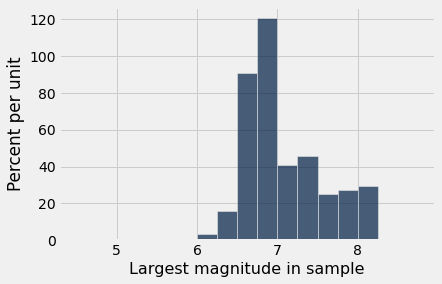

In [118]:
#Histogram of your maximums
Table().with_column('Largest magnitude in sample', maximums).hist('Largest magnitude in sample',bins=np.arange(4.5,9,0.25)) 

**Question 4.** Is a random sample of size 500 likely to help you determine the largest magnitude earthquake in the population? Find the magnitude of the (actual) strongest earthquake in 2017 to help you determine your answer. After this, explain whether you believe you can accurately use a sample size of 500 to determine the maximum. What is a specific con of using the maximum as your estimator? Use the histogram above to help answer. 

In [72]:
strongest_earthquake_magnitude = earthquakes.column("mag").max()
strongest_earthquake_magnitude

8.2

We can determine the largest magnitude by using sample of size 500. In the histogram it can be seen(approximately between 0.25 * 30 and 0.25 * 35). Specific con of using the maximum as estimator is that it can be heavily biased for small samples. The optimality properties may not apply for small samples.

**Question 5.** We would like to try and accurately predict the magnitude of the largest earthquake using a sample of 500 by using a different statistic, rather than the maximum. 

Assign `valid_statistic` to either 1, 2, or 3 corresponding to the *best* option below that can be used to predict the maximum using a sample in general (not just in this specific example). 

1. The mean of a sample  
2. The mean of a sample * 2
3. The largest value - the smallest value (the range)

In [96]:

valid_statistic = 2


**Question 6:** Just as we did before with the max, we would like to see if this new statistic is a good idea.

Simulate 5000 times the action of sampling 500 instances from the `earthquake` table, keeping track of the observed values of our test statistic from above. Then, make a histogram out of these test statistics. Be sure to keep track of your statistics in the `other_statistic` variable. 

In [107]:
other_statistic = make_array
for i in np.arange(5000): 
    sampled_numbers= earthquakes.sample(500).column("mag")
    other_statistic=np.append(other_statistic, 2*(sampled_numbers).mean())
other_statistic

array([<function make_array at 0x7fa09021f700>, 9.6604, 9.707600000000001,
       ..., 9.5924, 9.6168, 9.677599999999998], dtype=object)

TypeError: '<=' not supported between instances of 'function' and 'float'

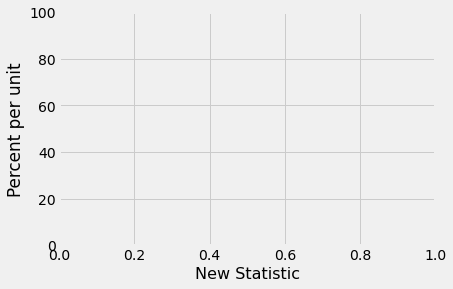

In [115]:
#Histogram of your statistics
Table().with_column('New Statistic', other_statistic).hist('New Statistic') #hata veriyor ?

In [119]:
Table().with_column('New Statistic', other_statistic)

New Statistic
""
9.6604
9.7076
9.6032
9.6552
9.6448
9.69044
9.63876
9.6368
9.6368


**Question 7.** Does our new statistic look like a reasonable predictor for the maximum? Explain why or why not. 

*Hint:* Remember what exactly this table is representing. Go back up and read the description of the table. 

hocam bi hata var histogramı göstermiyor nedenini bulamadım. If i could see the histogram i would check for the bias and variability of the bars to decide if it is a reasonable predictor or not for the maximum.

Congratulations! You have completed Homework 5! Please make sure you run all your code before submitting your homework.